In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat data dari file CSV ke dalam DataFrame pandas
df = pd.read_csv('obesity_data.csv')

X = df[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']].copy() 
y = df['ObesityCategory']

print(X,y)
# Gabungkan X dengan y
df_processed = pd.concat([X, y], axis=1)

# Simpan DataFrame ke file CSV
df_processed.to_csv('processed_obesse.csv', index=False)

print("Data telah disimpan ke processed_obesse.csv")

     Age      Height     Weight        BMI  PhysicalActivityLevel
0     56  173.575262  71.982051  23.891783                      4
1     69  164.127306  89.959256  33.395209                      2
2     46  168.072202  72.930629  25.817737                      4
3     32  168.459633  84.886912  29.912247                      3
4     60  183.568568  69.038945  20.487903                      3
..   ...         ...        ...        ...                    ...
995   18  155.588674  64.103182  26.480345                      4
996   35  165.076490  97.639771  35.830783                      1
997   49  156.570956  78.804284  32.146036                      1
998   64  164.192222  57.978115  21.505965                      4
999   66  178.537130  74.962164  23.517168                      1

[1000 rows x 5 columns] 0      Normal weight
1              Obese
2         Overweight
3         Overweight
4      Normal weight
           ...      
995       Overweight
996            Obese
997            

In [3]:
# Gabungkan X dengan y
df_processed = pd.concat([X, y], axis=1)

# Simpan DataFrame ke file CSV
df_processed.to_csv('processed_obesse.csv', index=False)

print("Data telah disimpan ke processed_obesse.csv")

Data telah disimpan ke processed_obesse.csv


In [4]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi data pelatihan dan pengujian (80% data pelatihan, 20% data pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dari data pelatihan dan pengujian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

# Menyimpan data pelatihan ke file CSV
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_obese.csv', index=False)

# Menyimpan data pengujian ke file CSV
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_obese.csv', index=False)

dp = pd.read_csv('train_obese.csv')
print(dp)

Jumlah data pelatihan: 800
Jumlah data pengujian: 200
     Age      Height     Weight        BMI  PhysicalActivityLevel  \
0     38  168.280866  89.904528  31.747687                      1   
1     31  171.420509  62.943867  21.420414                      3   
2     68  184.867471  42.457383  12.423164                      3   
3     59  162.567100  64.594380  24.441588                      1   
4     63  162.385378  83.474228  31.656184                      1   
..   ...         ...        ...        ...                    ...   
795   32  169.583785  74.398932  25.870097                      3   
796   75  188.116921  75.582530  21.358252                      4   
797   21  169.058974  81.158149  28.395903                      3   
798   47  163.570018  67.717000  25.309893                      1   
799   53  173.178052  53.279720  17.765451                      4   

    ObesityCategory  
0             Obese  
1     Normal weight  
2       Underweight  
3     Normal weight  
4      

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Memuat data pelatihan dan pengujian dari file CSV
train_data = pd.read_csv('train_obese.csv')
test_data = pd.read_csv('test_obese.csv')

# Memisahkan fitur dan label untuk data pelatihan
X_train = train_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_train = train_data['ObesityCategory']

# Memisahkan fitur dan label untuk data pengujian
X_test = test_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_test = test_data['ObesityCategory']

# Inisialisasi dan melatih model KNN
k = 3  # Jumlah tetangga terdekat yang akan digunakan
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Memprediksi label untuk data pengujian
y_pred = knn_model.predict(X_test)

# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[64  0  7  1]
 [ 0 29  3  0]
 [ 7  2 56  0]
 [ 3  0  0 28]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       0.86      0.89      0.88        72
        Obese       0.94      0.91      0.92        32
   Overweight       0.85      0.86      0.85        65
  Underweight       0.97      0.90      0.93        31

     accuracy                           0.89       200
    macro avg       0.90      0.89      0.90       200
 weighted avg       0.89      0.89      0.89       200



In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk melakukan KNN dengan jarak Euclidean
def knn_euclidean(X_train, y_train, X_test, y_test, n_neighbors):
    knn_euc = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn_euc.fit(X_train, y_train)
    y_pred_euc = knn_euc.predict(X_test)
    
    # Menampilkan confusion matrix
    print("Confusion Matrix (KNN with Euclidean Distance):")
    print(confusion_matrix(y_test, y_pred_euc))
    
    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred_euc)
    precision = precision_score(y_test, y_pred_euc, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred_euc, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred_euc, average='weighted', zero_division=1)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [7]:
# Fungsi untuk melakukan KNN dengan jarak Manhattan
def knn_manhattan(X_train, y_train, X_test, y_test, n_neighbors):
    knn_man = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan')
    knn_man.fit(X_train, y_train)
    y_pred_man = knn_man.predict(X_test)
    
    # Menampilkan confusion matrix
    print("Confusion Matrix (KNN with Manhattan Distance):")
    print(confusion_matrix(y_test, y_pred_man))
    
    # Menghitung dan menampilkan metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred_man)
    precision = precision_score(y_test, y_pred_man, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred_man, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred_man, average='weighted', zero_division=1)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [8]:
import pandas as pd
# Membaca dataset pelatihan
train_data = pd.read_csv('train_obese.csv')

# Membaca dataset pengujian
test_data = pd.read_csv('test_obese.csv')

In [9]:
# Memisahkan variabel independen (fitur) dan variabel dependen (label) pada data pelatihan
X_train = train_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_train = train_data['ObesityCategory']

In [10]:
# Memisahkan variabel independen (fitur) dan variabel dependen (label) pada data pelatihan
X_test = test_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_test = test_data['ObesityCategory']

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Membaca dataset pelatihan
train_data = pd.read_csv('train_obese.csv')
# Membaca dataset pengujian
test_data = pd.read_csv('test_obese.csv')

# Memisahkan variabel independen (fitur) dan variabel dependen (label) pada data pelatihan
X_train = train_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_train = train_data['ObesityCategory']


# Memisahkan variabel independen (fitur) dan variabel dependen (label) pada data pelatihan
X_test = test_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_test = test_data['ObesityCategory']

# Jumlah tetangga (k)
n_neighbors = 3

# Memanggil fungsi KNN dengan jarak Euclidean
print("KNN with Euclidean Distance:")
knn_euclidean(X_train, y_train, X_test, y_test, n_neighbors)
print("\n")

# Memanggil fungsi KNN dengan jarak ManhQattan
print("KNN with Manhattan Distance:")
knn_manhattan(X_train, y_train, X_test, y_test, n_neighbors)

KNN with Euclidean Distance:
Confusion Matrix (KNN with Euclidean Distance):
[[64  0  7  1]
 [ 0 29  3  0]
 [ 7  2 56  0]
 [ 3  0  0 28]]
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


KNN with Manhattan Distance:
Confusion Matrix (KNN with Manhattan Distance):
[[69  0  3  0]
 [ 0 28  4  0]
 [ 7  3 55  0]
 [ 3  0  0 28]]
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


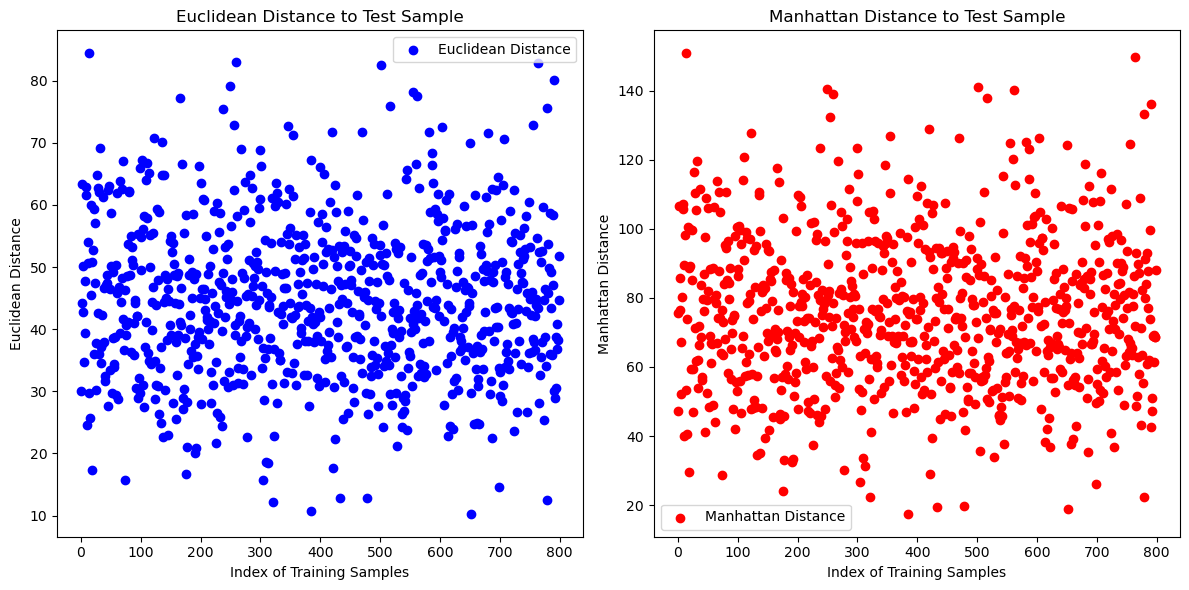

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data training dan testing dari file CSV
data_train = pd.read_csv('train_obese.csv')
data_test = pd.read_csv('test_obese.csv')

# Asumsi kolom fitur dan label
features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
label = 'ObesityCategory'

# Pilih satu data testing untuk visualisasi
test_sample = data_test.iloc[0]

# Hitung jarak Euclidean dan Manhattan
def euclidean_distance(train_sample, test_sample):
    return np.sqrt(np.sum((train_sample[features] - test_sample[features])**2))

def manhattan_distance(train_sample, test_sample):
    return np.sum(np.abs(train_sample[features] - test_sample[features]))

# List untuk menyimpan jarak
euclidean_distances = []
manhattan_distances = []

# Hitung jarak untuk setiap data training
for i in range(len(data_train)):
    train_sample = data_train.iloc[i]
    euclidean_distances.append(euclidean_distance(train_sample, test_sample))
    manhattan_distances.append(manhattan_distance(train_sample, test_sample))

# Buat DataFrame untuk hasil jarak
distances = pd.DataFrame({
    'index': range(len(data_train)),
    'euclidean': euclidean_distances,
    'manhattan': manhattan_distances
})

# Visualisasi hasil jarak
plt.figure(figsize=(12, 6))

# Scatter plot Euclidean
plt.subplot(1, 2, 1)
plt.scatter(distances['index'], distances['euclidean'], c='blue', label='Euclidean Distance')
plt.xlabel('Index of Training Samples')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance to Test Sample')
plt.legend()

# Scatter plot Manhattan
plt.subplot(1, 2, 2)
plt.scatter(distances['index'], distances['manhattan'], c='red', label='Manhattan Distance')
plt.xlabel('Index of Training Samples')
plt.ylabel('Manhattan Distance')
plt.title('Manhattan Distance to Test Sample')
plt.legend()

plt.tight_layout()
plt.show()


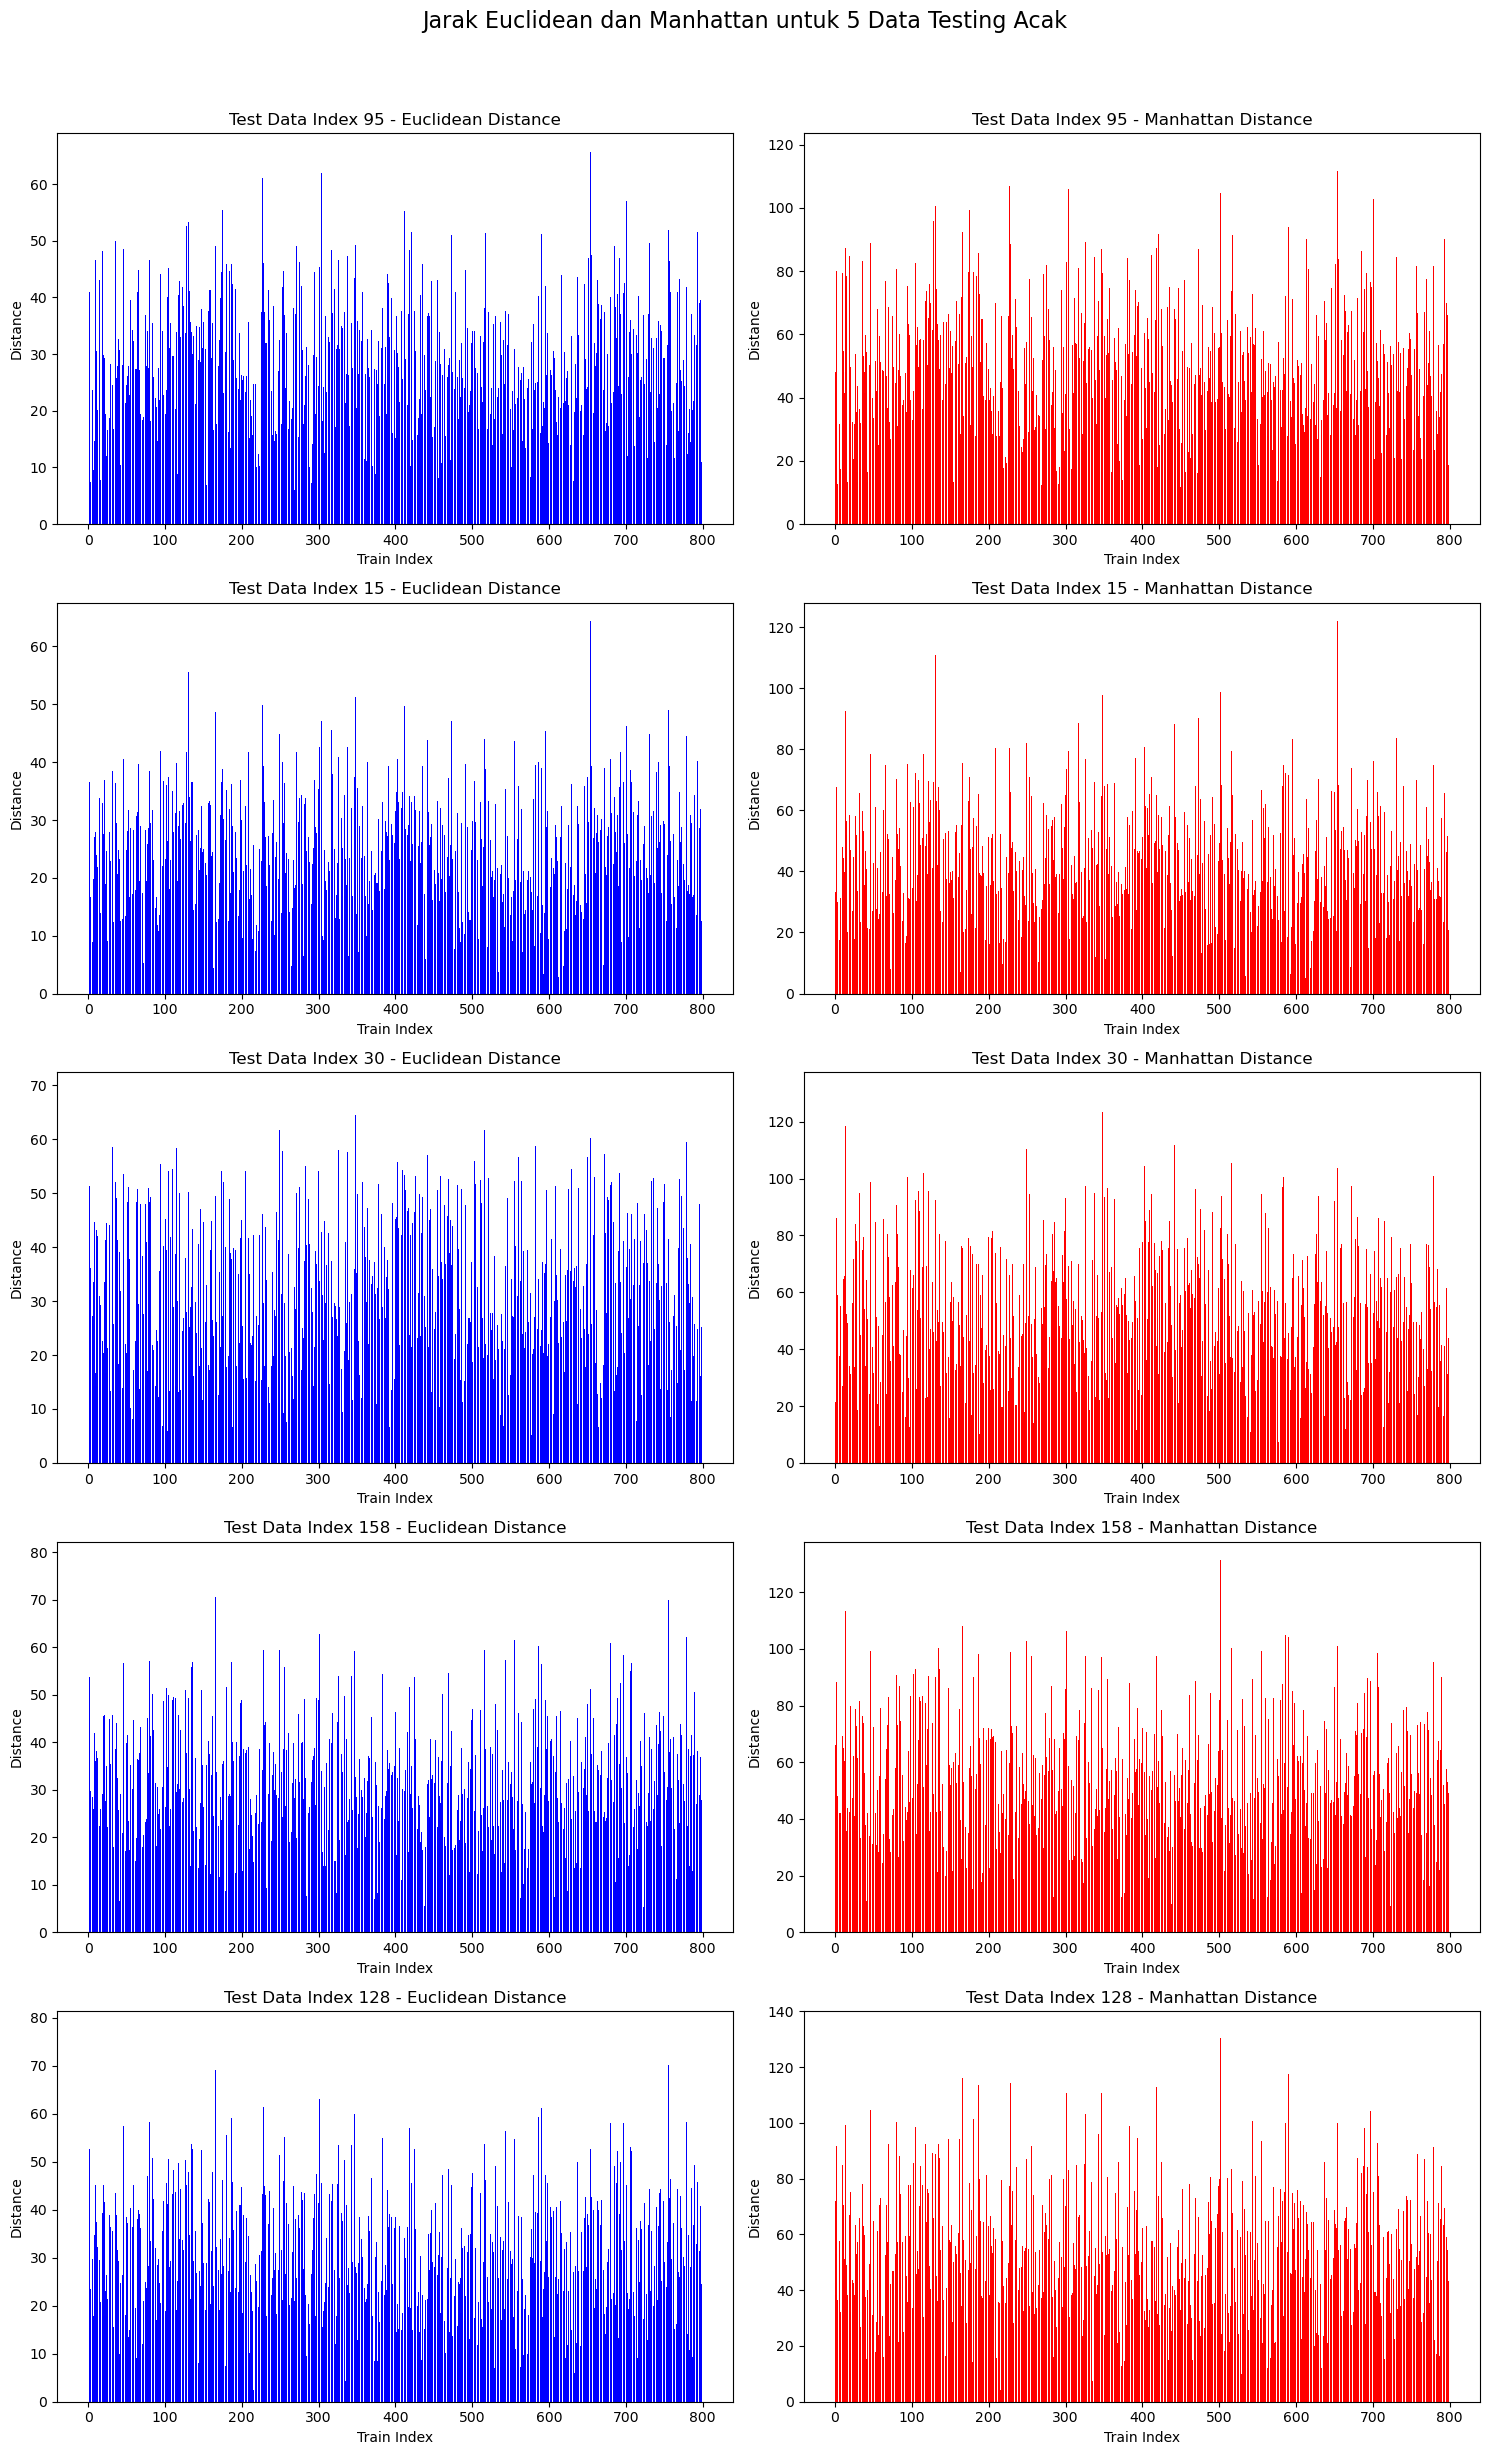

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data training dan testing dari file CSV
data_train = pd.read_csv('train_obese.csv')
data_test = pd.read_csv('test_obese.csv')

# Asumsi kolom fitur dan label
features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
label = 'ObesityCategory'

# Fungsi untuk menghitung jarak Euclidean dan Manhattan
def euclidean_distance(train_sample, test_sample):
    return np.sqrt(np.sum((train_sample[features] - test_sample[features])**2))

def manhattan_distance(train_sample, test_sample):
    return np.sum(np.abs(train_sample[features] - test_sample[features]))

# Pilih 5 data testing acak
test_samples = data_test.sample(5, random_state=42)

# List untuk menyimpan hasil jarak
distance_data = []

# Hitung jarak untuk setiap kombinasi data testing dan training
for test_index, test_sample in test_samples.iterrows():
    for train_index, train_sample in data_train.iterrows():
        euc_dist = euclidean_distance(train_sample, test_sample)
        man_dist = manhattan_distance(train_sample, test_sample)
        distance_data.append({
            'Test Index': test_index,
            'Train Index': train_index,
            'Euclidean Distance': euc_dist,
            'Manhattan Distance': man_dist
        })

# Buat DataFrame untuk hasil jarak
distance_df = pd.DataFrame(distance_data)

# Visualisasi hasil jarak untuk setiap data testing
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.suptitle('Jarak Euclidean dan Manhattan untuk 5 Data Testing Acak', fontsize=16)

for i, test_index in enumerate(test_samples.index):
    subset = distance_df[distance_df['Test Index'] == test_index]
    
    # Plot Euclidean Distance
    axes[i, 0].bar(subset['Train Index'], subset['Euclidean Distance'], color='blue')
    axes[i, 0].set_title(f'Test Data Index {test_index} - Euclidean Distance')
    axes[i, 0].set_xlabel('Train Index')
    axes[i, 0].set_ylabel('Distance')
    
    # Plot Manhattan Distance
    axes[i, 1].bar(subset['Train Index'], subset['Manhattan Distance'], color='red')
    axes[i, 1].set_title(f'Test Data Index {test_index} - Manhattan Distance')
    axes[i, 1].set_xlabel('Train Index')
    axes[i, 1].set_ylabel('Distance')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


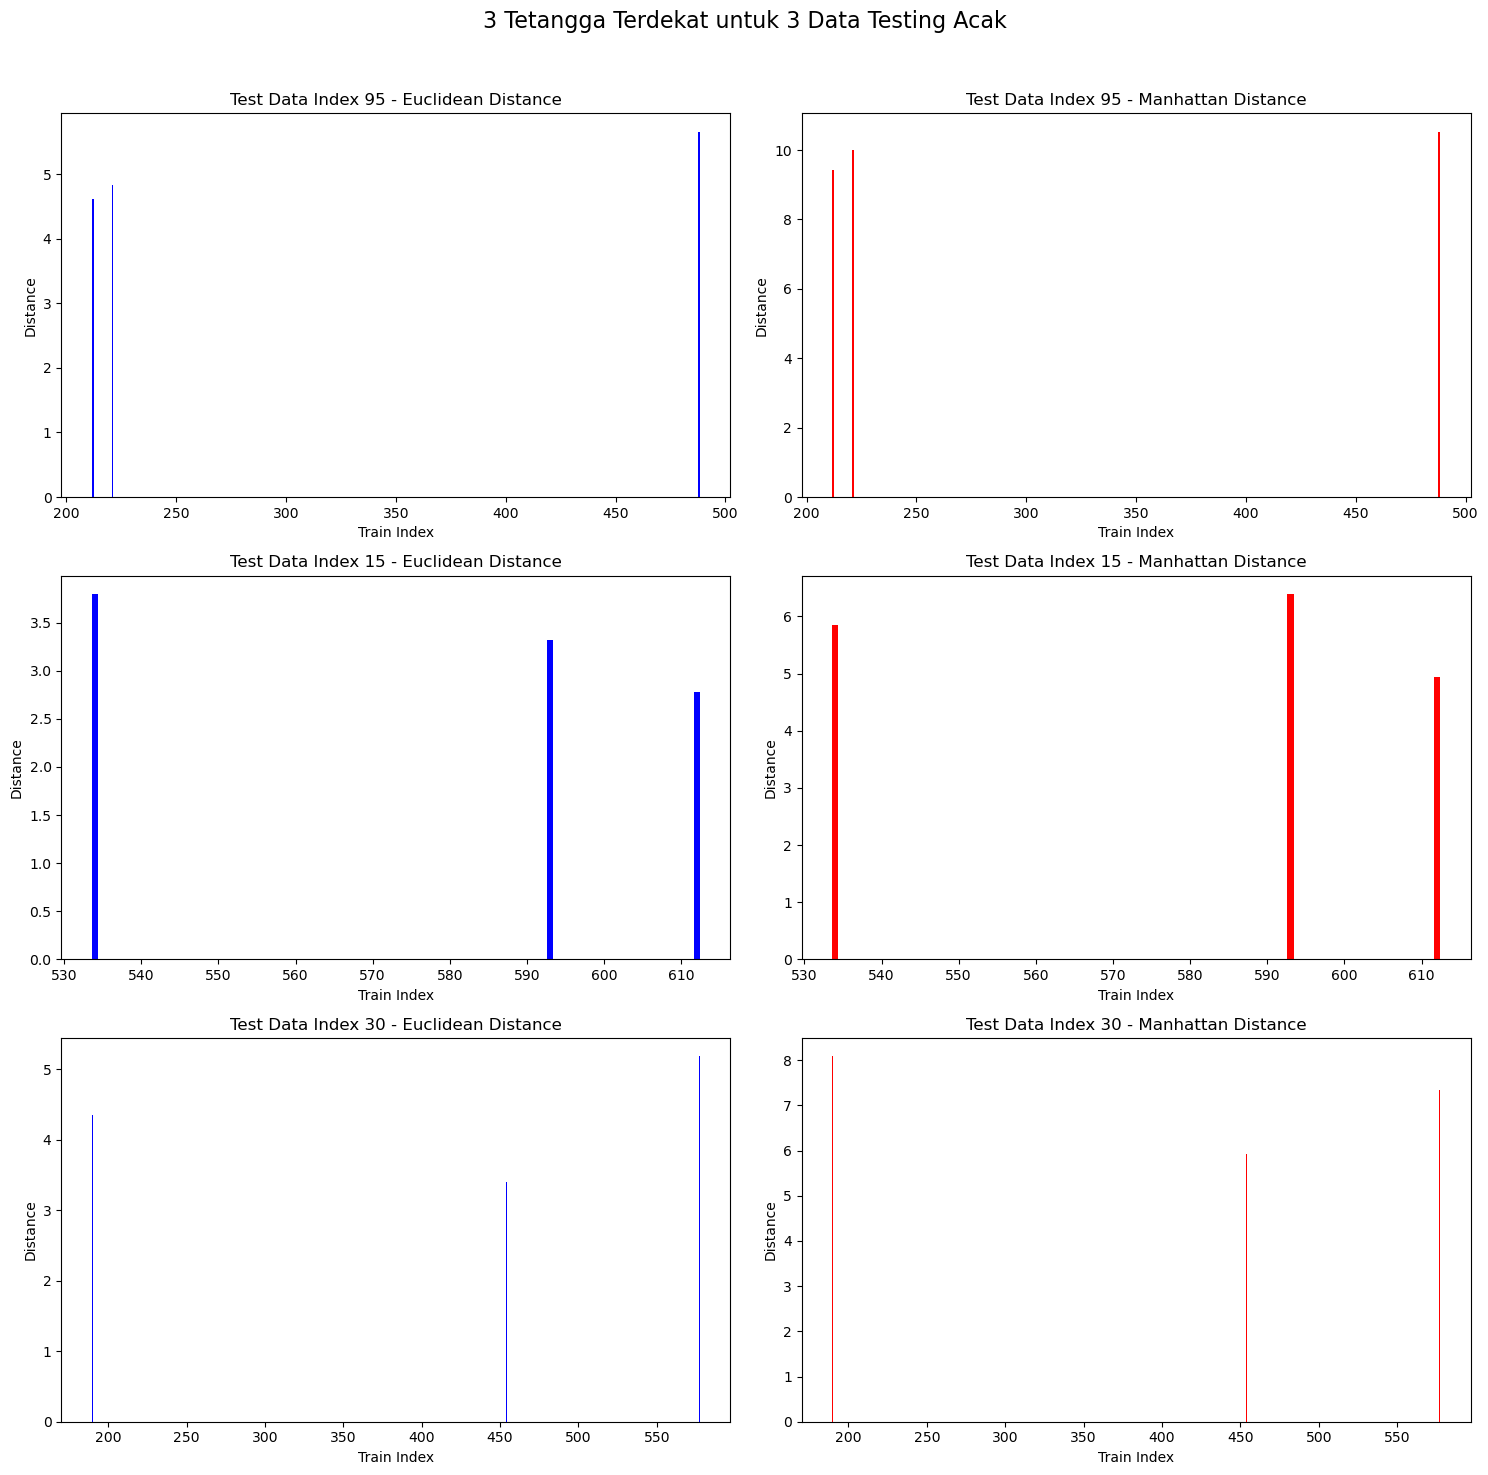

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data training dan testing dari file CSV
data_train = pd.read_csv('train_obese.csv')
data_test = pd.read_csv('test_obese.csv')

# Asumsi kolom fitur dan label
features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
label = 'ObesityCategory'

# Fungsi untuk menghitung jarak Euclidean dan Manhattan
def euclidean_distance(train_sample, test_sample):
    return np.sqrt(np.sum((train_sample[features] - test_sample[features])**2))

def manhattan_distance(train_sample, test_sample):
    return np.sum(np.abs(train_sample[features] - test_sample[features]))

# Pilih 3 data testing acak
test_samples = data_test.sample(3, random_state=42)

# List untuk menyimpan hasil jarak
distance_data = []

# Hitung jarak untuk setiap kombinasi data testing dan training
for test_index, test_sample in test_samples.iterrows():
    for train_index, train_sample in data_train.iterrows():
        euc_dist = euclidean_distance(train_sample, test_sample)
        man_dist = manhattan_distance(train_sample, test_sample)
        distance_data.append({
            'Test Index': test_index,
            'Train Index': train_index,
            'Euclidean Distance': euc_dist,
            'Manhattan Distance': man_dist
        })

# Buat DataFrame untuk hasil jarak
distance_df = pd.DataFrame(distance_data)

# Menemukan 3 tetangga terdekat untuk setiap data testing berdasarkan Euclidean dan Manhattan
nearest_neighbors = []

for test_index in test_samples.index:
    subset = distance_df[distance_df['Test Index'] == test_index]
    nearest_euc = subset.nsmallest(3, 'Euclidean Distance')
    nearest_man = subset.nsmallest(3, 'Manhattan Distance')
    nearest_neighbors.append((test_index, nearest_euc, nearest_man))

# Visualisasi hasil jarak untuk 3 tetangga terdekat dari setiap data testing
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('3 Tetangga Terdekat untuk 3 Data Testing Acak', fontsize=16)

for i, (test_index, nearest_euc, nearest_man) in enumerate(nearest_neighbors):
    # Plot Euclidean Distance
    axes[i, 0].bar(nearest_euc['Train Index'], nearest_euc['Euclidean Distance'], color='blue')
    axes[i, 0].set_title(f'Test Data Index {test_index} - Euclidean Distance')
    axes[i, 0].set_xlabel('Train Index')
    axes[i, 0].set_ylabel('Distance')
    
    # Plot Manhattan Distance
    axes[i, 1].bar(nearest_man['Train Index'], nearest_man['Manhattan Distance'], color='red')
    axes[i, 1].set_title(f'Test Data Index {test_index} - Manhattan Distance')
    axes[i, 1].set_xlabel('Train Index')
    axes[i, 1].set_ylabel('Distance')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [15]:
import pandas as pd
import numpy as np

# Import data training dan testing dari file CSV
data_train = pd.read_csv('train_obese.csv')
data_test = pd.read_csv('test_obese.csv')

# Asumsi kolom fitur dan label
features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
label = 'ObesityCategory'

# Fungsi untuk menghitung jarak Euclidean dan Manhattan
def euclidean_distance(train_sample, test_sample):
    return np.sqrt(np.sum((train_sample[features] - test_sample[features])**2))

def manhattan_distance(train_sample, test_sample):
    return np.sum(np.abs(train_sample[features] - test_sample[features]))

# List untuk menyimpan hasil jarak
distance_data = []

# Hitung jarak untuk setiap kombinasi data testing dan training
for test_index, test_sample in data_test.iterrows():
    for train_index, train_sample in data_train.iterrows():
        euc_dist = euclidean_distance(train_sample, test_sample)
        man_dist = manhattan_distance(train_sample, test_sample)
        distance_data.append({
            'Test Index': test_index,
            'Train Index': train_index,
            'Euclidean Distance': euc_dist,
            'Manhattan Distance': man_dist
        })

# Buat DataFrame untuk hasil jarak
distance_df = pd.DataFrame(distance_data)

# Tampilkan hasil secara iteratif
chunk_size = 1000  # Ubah sesuai kebutuhan
num_chunks = len(distance_df) // chunk_size + 1

for i in range(num_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(distance_df))
    print(distance_df[start:end])

# Jika ingin menyimpan hasil dalam file CSV
# distance_df.to_csv('distance_results.csv', index=False)


     Test Index  Train Index  Euclidean Distance  Manhattan Distance
0             0            0           30.041321           47.151436
1             0            1           44.267236           75.484690
2             0            2           63.397022          106.521462
3             0            3           50.199719           85.666412
4             0            4           42.803610           76.385722
..          ...          ...                 ...                 ...
995           1          195           25.362981           46.053475
996           1          196           18.629129           34.485740
997           1          197           31.001649           60.244552
998           1          198           30.424688           52.899115
999           1          199            9.908522           18.448648

[1000 rows x 4 columns]
      Test Index  Train Index  Euclidean Distance  Manhattan Distance
1000           1          200           34.553558           55.929469
1001   

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
17000          21          200           17.114717           32.242337
17001          21          201           25.669312           38.627887
17002          21          202           26.131523           46.040831
17003          21          203           49.266619           90.574262
17004          21          204           23.548895           39.377079
...           ...          ...                 ...                 ...
17995          22          395           31.522534           46.132506
17996          22          396           23.240271           39.827079
17997          22          397           29.057815           41.173252
17998          22          398            8.560762           15.242021
17999          22          399           28.174699           39.555785

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
18000          22          400           31.088820  

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
29000          36          200           21.751927           34.162245
29001          36          201           46.935027           79.877210
29002          36          202           27.997659           46.016642
29003          36          203           55.434447           93.788265
29004          36          204           34.939696           57.549995
...           ...          ...                 ...                 ...
29995          37          395           22.542960           42.923170
29996          37          396           49.203250           80.154278
29997          37          397           25.005035           45.591057
29998          37          398           41.152272           76.745264
29999          37          399           20.653910           38.863944

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
30000          37          400           49.608126  

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
43000          53          600           15.464930           31.167147
43001          53          601           26.757794           47.919993
43002          53          602           23.085455           40.956097
43003          53          603           16.437922           25.015633
43004          53          604           34.554779           52.294262
...           ...          ...                 ...                 ...
43995          54          795           12.532108           22.459142
43996          54          796           35.933634           51.149711
43997          54          797           24.254922           43.268977
43998          54          798           15.828995           28.214362
43999          54          799           22.957758           40.593735

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
44000          55            0           21.325986  

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
55000          68          600           16.060189           24.764426
55001          68          601           48.175012           86.933621
55002          68          602           44.503067           81.969725
55003          68          603           38.972507           62.029262
55004          68          604           55.959977           76.199722
...           ...          ...                 ...                 ...
55995          69          795           18.832111           31.771581
55996          69          796           31.312785           53.375486
55997          69          797           31.755197           52.581417
55998          69          798            9.769846           13.988588
55999          69          799           16.278474           27.046543

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
56000          70            0           43.108598  

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
68000          85            0           48.802111           82.757101
68001          85            1           44.730817           55.298509
68002          85            2           29.745303           55.132776
68003          85            3           16.997383           26.323016
68004          85            4           28.192100           48.599182
...           ...          ...                 ...                 ...
68995          86          195           37.680855           60.726282
68996          86          196           19.229746           31.692849
68997          86          197           30.519660           49.960182
68998          86          198           33.935251           59.399603
68999          86          199           28.965913           57.087506

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
69000          86          200           15.120889  

       Test Index  Train Index  Euclidean Distance  Manhattan Distance
78000          97          400           43.135923           66.761859
78001          97          401           60.602117          105.594975
78002          97          402           59.974230           88.439999
78003          97          403           65.107162          124.268686
78004          97          404           54.385692          104.755578
...           ...          ...                 ...                 ...
78995          98          595           38.366080           72.972006
78996          98          596           33.205568           58.476543
78997          98          597           37.766023           58.601765
78998          98          598           23.413087           39.500151
78999          98          599           18.213924           31.278103

[1000 rows x 4 columns]
       Test Index  Train Index  Euclidean Distance  Manhattan Distance
79000          98          600           34.579201  

        Test Index  Train Index  Euclidean Distance  Manhattan Distance
100000         125            0            7.286736           12.836879
100001         125            1           30.224243           46.264457
100002         125            2           66.217700          124.195152
100003         125            3           38.219807           65.458504
100004         125            4           31.883923           43.545781
...            ...          ...                 ...                 ...
100995         126          195           51.179213           83.872843
100996         126          196           33.506813           50.839411
100997         126          197           16.490387           29.174411
100998         126          198           35.848122           54.418592
100999         126          199           35.594877           70.106495

[1000 rows x 4 columns]
        Test Index  Train Index  Euclidean Distance  Manhattan Distance
101000         126          200        

        Test Index  Train Index  Euclidean Distance  Manhattan Distance
120000         150            0           51.314587           88.163839
120001         150            1           49.226469           63.453717
120002         150            2           34.251958           65.922209
120003         150            3           20.586441           28.833826
120004         150            4           28.757541           50.746548
...            ...          ...                 ...                 ...
120995         151          195           26.039136           45.290374
120996         151          196           34.312904           69.783052
120997         151          197           47.297546           87.541864
120998         151          198           37.722054           68.345841
120999         151          199           13.912691           23.391684

[1000 rows x 4 columns]
        Test Index  Train Index  Euclidean Distance  Manhattan Distance
121000         151          200        

        Test Index  Train Index  Euclidean Distance  Manhattan Distance
132000         165            0           38.496556           57.091331
132001         165            1           48.413940           71.945042
132002         165            2           44.533008           74.266942
132003         165            3           26.358877           50.126764
132004         165            4           17.048504           31.465016
...            ...          ...                 ...                 ...
132995         166          195           37.090757           65.362262
132996         166          196           20.773411           30.767465
132997         166          197            9.667627           16.991346
132998         166          198           40.892598           60.466979
132999         166          199           30.104154           55.701854

[1000 rows x 4 columns]
        Test Index  Train Index  Euclidean Distance  Manhattan Distance
133000         166          200        

        Test Index  Train Index  Euclidean Distance  Manhattan Distance
144000         180            0           26.764063           48.915669
144001         180            1           29.526989           50.714329
144002         180            2           41.470540           78.645024
144003         180            3            9.223805           16.414344
144004         180            4           13.552055           25.086934
...            ...          ...                 ...                 ...
144995         181          195           20.674326           35.600973
144996         181          196           33.407057           68.097896
144997         181          197           55.295367          109.856707
144998         181          198           49.646867           91.053807
144999         181          199           28.944269           46.099651

[1000 rows x 4 columns]
        Test Index  Train Index  Euclidean Distance  Manhattan Distance
145000         181          200        

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_euclidean(X_train, y_train, X_test, y_test, n_neighbors):
    # Inisialisasi model KNN dengan jarak Euclidean
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    
    # Melatih model KNN dengan data latih
    knn.fit(X_train, y_train)
    
    # Melakukan prediksi menggunakan data uji
    y_pred = knn.predict(X_test)
    
    # Menampilkan data aktual, prediksi, dan evaluasi kebenaran prediksi
    print("KNN with Euclidean Distance:")
    print("============================")
    for i in range(len(X_test)):
        actual = y_test.iloc[i]
        predicted = y_pred[i]
        if actual == predicted:
            result = "Sesuai"
        else:
            result = "Tidak Sesuai"
        print(f"Data ke-{i+1}: Aktual = {actual}, Prediksi = {predicted} ({result})")
    

def knn_manhattan(X_train, y_train, X_test, y_test, n_neighbors):
    # Inisialisasi model KNN dengan jarak Manhattan
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan')
    
    # Melatih model KNN dengan data latih
    knn.fit(X_train, y_train)
    
    # Melakukan prediksi menggunakan data uji
    y_pred = knn.predict(X_test)
    
    
    
    # Menampilkan data aktual, prediksi, dan evaluasi kebenaran prediksi
    print("KNN with Manhattan Distance:")
    print("============================")
    for i in range(len(X_test)):
        actual = y_test.iloc[i]
        predicted = y_pred[i]
        if actual == predicted:
            result = "Sesuai"
        else:
            result = "Tidak Sesuai"
        print(f"Data ke-{i+1}: Aktual = {actual}, Prediksi = {predicted} ({result})")
    
  

# Contoh penggunaan dengan memanggil kedua fungsi KNN
n_neighbors = 3

In [17]:
knn_euclidean(X_train, y_train, X_test, y_test, n_neighbors)

KNN with Euclidean Distance:
Data ke-1: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-2: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-3: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-4: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-5: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-6: Aktual = Normal weight, Prediksi = Overweight (Tidak Sesuai)
Data ke-7: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-8: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-9: Aktual = Overweight, Prediksi = Normal weight (Tidak Sesuai)
Data ke-10: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-11: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-12: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-13: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-14: Aktual = Obese, Prediksi = Obese (Sesuai)
Data ke-15: Aktual = Overweight, Prediksi = Overwe

In [18]:
knn_manhattan(X_train, y_train, X_test, y_test, n_neighbors)

KNN with Manhattan Distance:
Data ke-1: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-2: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-3: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-4: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-5: Aktual = Overweight, Prediksi = Overweight (Sesuai)
Data ke-6: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-7: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-8: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-9: Aktual = Overweight, Prediksi = Normal weight (Tidak Sesuai)
Data ke-10: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-11: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-12: Aktual = Underweight, Prediksi = Underweight (Sesuai)
Data ke-13: Aktual = Normal weight, Prediksi = Normal weight (Sesuai)
Data ke-14: Aktual = Obese, Prediksi = Obese (Sesuai)
Data ke-15: Aktual = Overweight, Prediksi = Overweigh